In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [16]:
import time

In [49]:
import seaborn as sns

In [19]:
import dateutil.parser as parser

In [57]:
import matplotlib.dates as mdates

In [4]:
mdata = pd.read_csv('new_data_set.csv')

In [5]:
mdata.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [6]:
mdata.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [7]:
mdata.shape

(4383, 5)

In [8]:
mdata.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [9]:
mdata=mdata.set_index('Date')

In [10]:
mdata.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [43]:
days=[]
months=[]
years=[]

In [44]:
for i in mdata.index:
    months.append(parser.parse(i).month)
    years.append(parser.parse(i).year)
    days.append(parser.parse(i).day)

In [45]:
len(mdata['Consumption'])

4383

In [46]:
# len(mdata.index)
len(days)

4383

In [47]:
mdata['Year'] = years
mdata['Month'] = months
mdata['day'] = days

In [48]:
mdata.head(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5


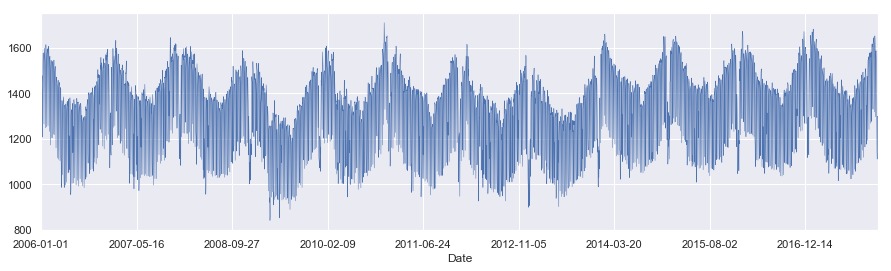

In [50]:
sns.set(rc={'figure.figsize':(15, 4)})
mdata['Consumption'].plot(linewidth=0.5);

In [51]:
cols_plot = ['Consumption', 'Solar', 'Wind']

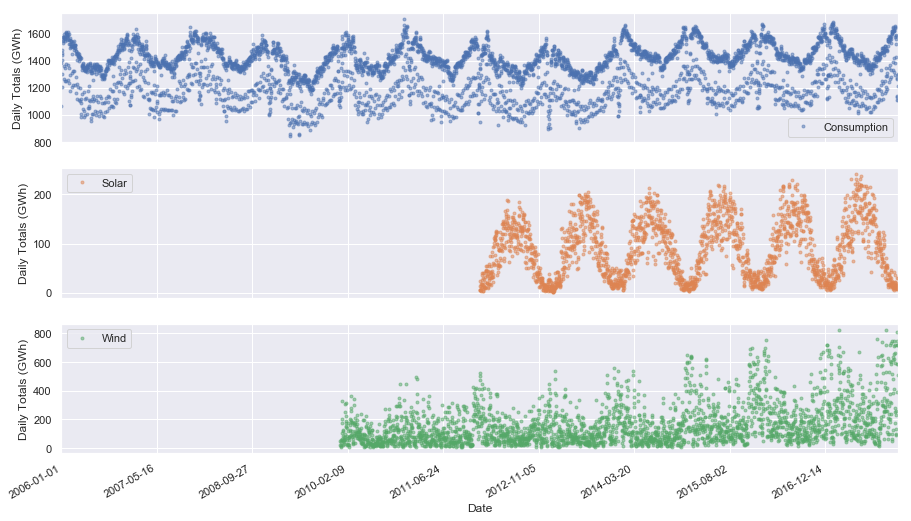

In [52]:
axes = mdata[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

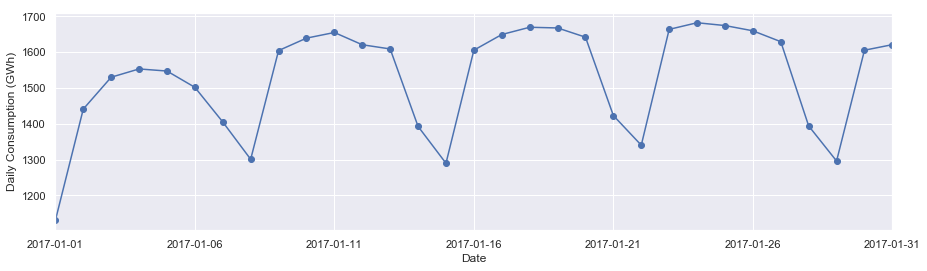

In [56]:
ax = mdata.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

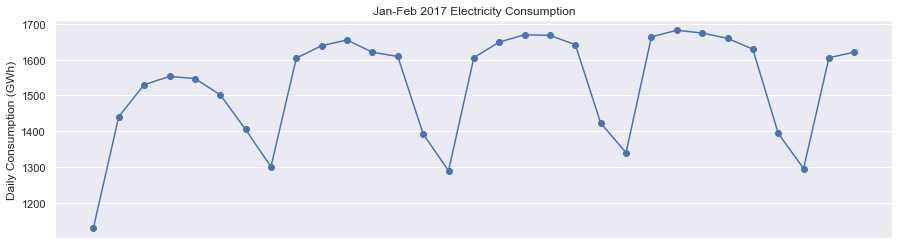

In [58]:
fig, ax = plt.subplots()
ax.plot(mdata.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

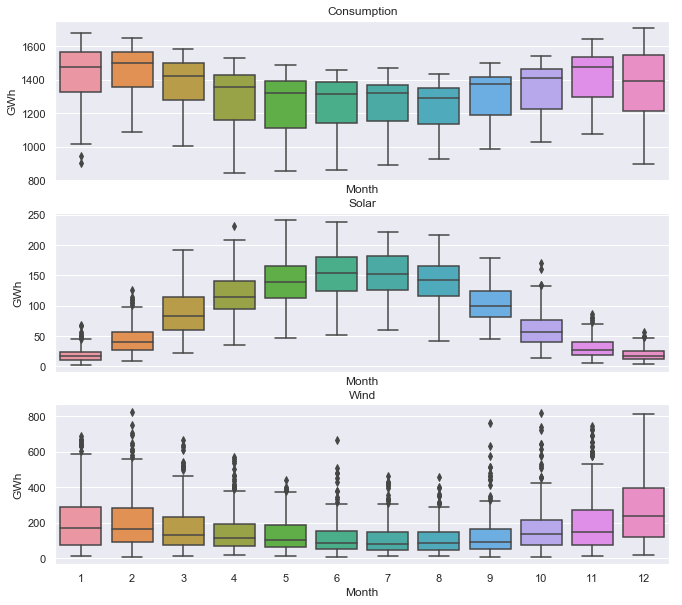

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=mdata, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
if ax != axes[-1]:
    ax.set_xlabel('')